<img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 450px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;  margin-top:40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Statistical trading and Reinforcement Learning</center></div>
<div style= "font-size: 40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>strategies of NVIDIA stock prices</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Otimização de Estratégias Orientadas por Dados 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Grupo 7:</center></div>
   <div><center> Diogo Freitas | 104841 </center></div>
   <div><center> João Francisco Botas | 104782 </center></div>
   <div><center> Rebeca Sampaio |  126628 </center></div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Bibliotecas para desenvolvimento do projeto</a></li>
    <li><a href="#2">Escolha do stock a estudar</a></li>
    <li><a href="#3">Extração de dados</a>
        <ol>
            <li><a href="#3.1">Transformação dos dados</a></li>
            <li><a href="#3.2">Gráficos úteis e Dashboard</a></li>
            <li><a href="#3.3">Cálculo das métricas</a></li>
                <ol>
                    <li><a href="#3.3.1">Retornos</a></li>
                    <li><a href="#3.3.2">Retornos médios esperados e risco</a></li>
                </ol>
        </ol>
    </li>
    <li><a href="#4">Estratégia Estatística de Trading</a>
    <li><a href="#5">Algoritmo de Reinforcement Learning de Trading</a>
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Bibliotecas para desenvolvimento do projeto** 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
# import talib as ta
import quantstats as qs
import mplfinance as mpf
from backtesting import Backtest, Strategy
import gymnasium as gym
import gym_anytrading
import plotly.graph_objects as go

pip install -r requirements.txt

# <a class='anchor' id='2'></a>

> # **2. Escolha do Stock a estudar** 

TODO: Escrever texto do porquê escolhermos a NVIDIA

Para o desenvolvimento deste projeto vamos utilizar os stocks da NVIDIA no período homólogo de 2019-2024. Ou seja, serão importados os dados de 1 de janeiro de 2019 até 31 de outubro de 2024, data em que se iniciou este projeto.

# <a class='anchor' id='3'></a>

> # **3. Extração de dados** 

In [16]:
ticker = "XOM"
start_date = "2019-01-01" # Não há dia 1 de janeiro de 2019...
end_date = "2024-11-01" # para incluir também o dia 31 de outubro de 2024
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [17]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1469 entries, 2019-01-02 to 2024-10-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, XOM)  1469 non-null   float64
 1   (Close, XOM)      1469 non-null   float64
 2   (High, XOM)       1469 non-null   float64
 3   (Low, XOM)        1469 non-null   float64
 4   (Open, XOM)       1469 non-null   float64
 5   (Volume, XOM)     1469 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 80.3 KB


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,XOM,XOM,XOM,XOM,XOM,XOM
Date,,,,,,
2019-01-02,52.182491,69.690002,69.870003,67.260002,67.349998,16727200
2019-01-03,51.381290,68.620003,70.250000,68.360001,70.000000,13866100
2019-01-04,53.275711,71.150002,71.269997,69.360001,69.639999,16043600
2019-01-07,53.552746,71.519997,72.099998,70.739998,71.250000,10844200
2019-01-08,53.942123,72.040001,72.589996,71.940002,72.540001,11439000
...,...,...,...,...,...,...
2024-10-25,118.516136,119.489998,120.430000,119.320000,120.199997,10714600
2024-10-28,117.930946,118.900002,119.010002,116.769997,116.790001,11844500


# <a class='anchor' id='3.1'></a>

> ## **3.1 Transformação de dados**

In [18]:
# see nulls in data
data.isnull().sum()

Price      Ticker
Adj Close  XOM       0
Close      XOM       0
High       XOM       0
Low        XOM       0
Open       XOM       0
Volume     XOM       0
dtype: int64

Após descarregarmos os dados no período indicado, verificamos que não há valores omissos nos 1468 dias/entradas do dataset. Vemos a existência de variavéis que correspondem a:

1. **Date**  
   - Representa a data da observação dos preços históricos (varia entre 01-01-2019 e 31-10-2024);

2. **Adj Close** (Adjusted Close)  
   - O preço ajustado de "fecho" da ação, considerando eventos como dividendos, splits e outras ações corporativas que afetam o valor da ação;

3. **Close**  
   - O preço de "fecho" da ação no final do dia, sem ajustes para eventos corporativos;

4. **High**  
   - O preço mais alto alcançado pela ação durante o dia;

5. **Low**  
   - O preço mais baixo alcançado pela ação durante o dia;

6. **Open**  
   - O preço inicial da ação no início do dia;

7. **Volume**  
   - O número total de ações negociadas durante o dia.

In [19]:
# transformar a data do indice 0para datetime e mostrar só até ao dia (sem horas)
data.index = pd.to_datetime(data.index)
data.index = data.index.strftime('%Y-%m-%d')
data = data.reset_index() # retira-se o index para poder usar a data como coluna

In [20]:
# retirar o MultiIndex das colunas (sempre NVDA e Ticker)
if isinstance(data.columns, pd.MultiIndex):
    data.columns = [' '.join(map(str, col)).strip() for col in data.columns]
data.columns = [col.replace(f"{ticker}", "").replace("Ticker", "").strip() for col in data.columns]
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-01-02,52.182491,69.690002,69.870003,67.260002,67.349998,16727200
1,2019-01-03,51.381290,68.620003,70.250000,68.360001,70.000000,13866100
2,2019-01-04,53.275711,71.150002,71.269997,69.360001,69.639999,16043600
3,2019-01-07,53.552746,71.519997,72.099998,70.739998,71.250000,10844200
4,2019-01-08,53.942123,72.040001,72.589996,71.940002,72.540001,11439000
...,...,...,...,...,...,...,...
1464,2024-10-25,118.516136,119.489998,120.430000,119.320000,120.199997,10714600
1465,2024-10-28,117.930946,118.900002,119.010002,116.769997,116.790001,11844500
1466,2024-10-29,116.324150,117.279999,119.169998,117.070000,118.580002,14731000
1467,2024-10-30,115.738960,116.690002,118.269997,116.480003,117.660004,12303700


# <a class='anchor' id='3.2'></a>

> ## **3.2 Gráficos úteis e Dashboard** 

Visualização de um gráfico com o matplotlib de High e Low com área entre os dois para ver flutuações mais evidentes.

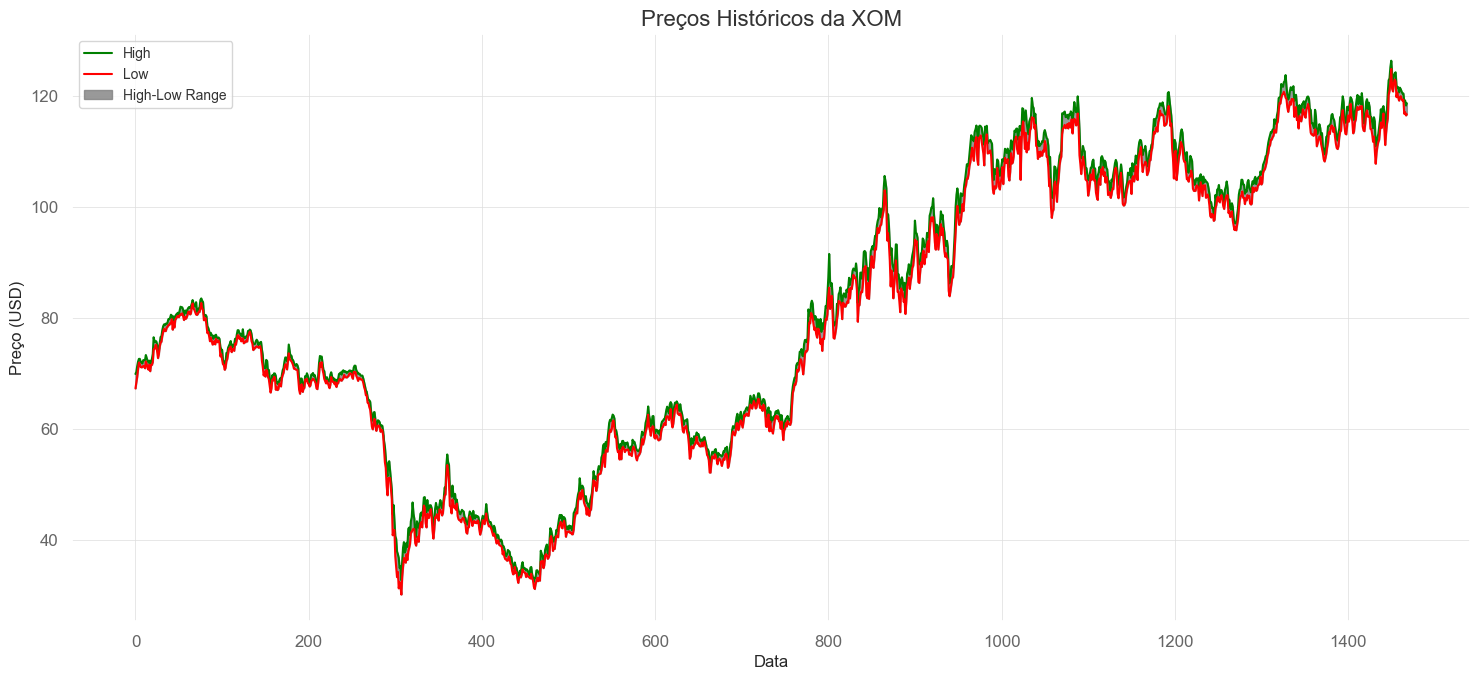

In [23]:
plt.figure(figsize=(15, 7))

# plt.plot(data.index, data['Adj Close'], label="Adj Close", color='blue')
# plt.plot(data.index, data['Close'], label="Close", color='orange')

# mostra apenas os dias de 1 a 1468 (2019-01-02 a 2024-10-31)
plt.plot(data.index, data['High'], label="High", color='green')
plt.plot(data.index, data['Low'], label="Low", color='red')
plt.fill_between(data.index, data['High'], data['Low'], color='grey', alpha=0.8, label='High-Low Range')

plt.title(f"Preços Históricos da {ticker}", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Preço (USD)", fontsize=12)
plt.legend(loc='upper left', fontsize=10)


# Exibir gráfico
plt.tight_layout()
plt.show()

Gráfico OHLC com plotly para ter uma interatividade a mais nas colunas apresentadas.

Foi inspirado nos links seguintes:
- https://plotly.com/python/ohlc-charts/
- https://dash.plotly.com/tutorial?utm_medium=graphing_libraries&utm_content=python_footer&_gl=1 (ver como se faz)


In [22]:
# TODO: ver este gráfico melhor

fig = go.Figure(data=go.Ohlc(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close']))
fig.update(layout_xaxis_rangeslider_visible=False)

fig.update_layout(
    title=dict(text=f'Gráfico OHLC da {ticker}'),
    yaxis=dict(title=dict(text='Preço (USD)')),
    # shapes = [dict(
    #    x0='2023-05-25', x1='2023-05-25', y0=0, y1=1, xref='x', yref='paper',
    #    line_width=2)],
    #annotations=[dict(
    #    x='2023-05-25', y=0.05, xref='x', yref='paper',
    #    showarrow=False, xanchor='left', text='AI Chip announcement')]
)

fig.show()

# <a class='anchor' id='3.3'></a>

> ## **3.3. Cálculo das métricas** 

# <a class='anchor' id='3.3.1'></a>

> ### **3.3.1 Retornos** 

Taxa de retorno entre dia anterior e presente.

Transforma-se a Data em index outra vez para podermos ter uma referência mais correta da data e do retorno nesse dia versus dia anterior.

In [9]:
data.set_index('Date', inplace=True)
returns = data["Adj Close"].pct_change() # TODO: mudar o intervalo de datas para não ter omissos maybe
returns

Date
2019-01-02         NaN
2019-01-03   -0.015354
2019-01-04    0.036870
2019-01-07    0.005200
2019-01-08    0.007271
                ...   
2024-10-25   -0.000836
2024-10-28   -0.004938
2024-10-29   -0.013625
2024-10-30   -0.005031
2024-10-31    0.000771
Name: Adj Close, Length: 1469, dtype: float64

# <a class='anchor' id='3.3.2'></a>

> ### **3.3.2 Retornos médios esperados e risco** 

In [10]:
# daily risk free rate
rf = (1.02 ** (1/360))-1
# Calculate volatilities , expected returns and sharpe ratios.
volatility = returns.std() # volatility
exp_returns = returns.mean() # expected returns
sr = (exp_returns-rf)/volatility # Sharpe ratio

print(f"O retorno esperado é de: {exp_returns}")
print(f"O risco é de: {volatility}")
print(f"O Sharpe ratio é de: {sr}")

O retorno esperado é de: 0.0007535338237268658
O risco é de: 0.02051017799329464
O Sharpe ratio é de: 0.034057481752773906


| Métrica               | Fórmula                           | Valor          | Explicação                                                                                 |
|-----------------------|------------------------------------|----------------|-------------------------------------------------------------------------------------------|
| **Taxa Livre de Risco (rf)** | $rf = (1 + 0.02)^{1/360} - 1$ | `0.000055567` | Taxa de retorno diário sem risco, assumindo uma taxa anual de 2% e ajustada para 360 dias úteis. |
| **Volatilidade**       | $\sigma = \text{std}(\text{returns})$ | `x.xxx`        | O desvio padrão dos retornos diários, indicando a variabilidade ou risco do ativo.       |
| **Retorno Esperado**   | $\mu = \text{mean}(\text{returns})$ | `x.xxx`        | A média dos retornos diários, representando o retorno esperado do ativo.                |
| **Sharpe Ratio (sr)**  | $SR = \frac{\mu - rf}{\sigma}$ | `x.xxx`        | Medida de retorno ajustado ao risco, calculada como o excesso de retorno dividido pela volatilidade. |


In [11]:
# define function that compute CAGR
def cagr(start_value , end_value , num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1
# example
start_value = float(data["Adj Close"].iloc[0])
end_value = float(data["Adj Close"].iloc[-1])
num_periods = len(data["Adj Close"])
result = cagr(start_value , end_value , num_periods)
print(result)

0.0005433091497559772


# <a class='anchor' id='4'></a>

> # **4. Estratégia Estatística de Trading** 

Foi utilizado este método porque o preço de NVDA cresceu exponencialmente no período estudado e também porque queremos dar mais destaque aos dados mais recentes do período indicado.
Links úteis:
- Ver conceitos do método de Média Móvel Exponencial: https://www.investopedia.com/terms/e/ema.asp
- Ver função ewn() do pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
- Ver aplicabilidades deste método (mini revisão-literatura): TODO

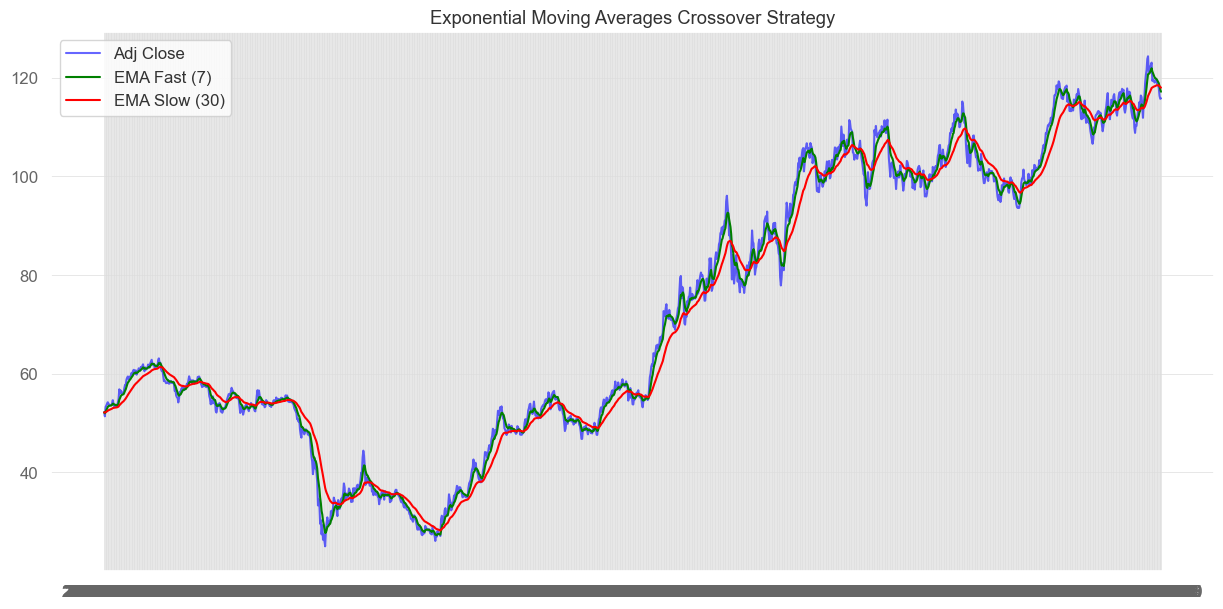

Cumulative Strategy Returns: 2.31


In [12]:
# copy data
data_plus = data.copy()

data_plus['EMA_Fast'] = data_plus['Adj Close'].ewm(span=7, adjust=False).mean() # período de 7 dias para a rápida (semanal)
data_plus['EMA_Slow'] = data_plus['Adj Close'].ewm(span=30, adjust=False).mean() # período de 30 dias para a lenta (mensal)

# Define the crossover strategy
data_plus['Signal'] = np.where(data_plus['EMA_Fast'] > data_plus['EMA_Slow'], 1, 0)
data_plus['Position'] = data_plus['Signal'].diff()

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(data_plus['Adj Close'], label="Adj Close", color='blue', alpha=0.6)
plt.plot(data_plus['EMA_Fast'], label="EMA Fast (7)", color='green')
plt.plot(data_plus['EMA_Slow'], label="EMA Slow (30)", color='red')
plt.title("Exponential Moving Averages Crossover Strategy")
plt.legend()
plt.show()

# Backtest performance
data_plus['Daily Returns'] = data_plus['Adj Close'].pct_change()
data_plus['Strategy Returns'] = data_plus['Daily Returns'] * data_plus['Signal'].shift(1)
cumulative_strategy_returns = (1 + data_plus['Strategy Returns']).cumprod()

print(f"Cumulative Strategy Returns: {cumulative_strategy_returns.iloc[-1]:.2f}")

In [13]:
data_plus

,Adj Close,Close,High,Low,Open,Volume,EMA_Fast,EMA_Slow,Signal,Position,Daily Returns,Strategy Returns
Date,,,,,,,,,,,,
2019-01-02,52.182491,69.690002,69.870003,67.260002,67.349998,16727200,52.182491,52.182491,0,NaN,NaN,NaN
2019-01-03,51.381290,68.620003,70.250000,68.360001,70.000000,13866100,51.982191,52.130801,0,0.0,-0.015354,-0.000000
2019-01-04,53.275711,71.150002,71.269997,69.360001,69.639999,16043600,52.305571,52.204666,1,1.0,0.036870,0.000000
2019-01-07,53.552746,71.519997,72.099998,70.739998,71.250000,10844200,52.617365,52.291639,1,0.0,0.005200,0.005200
2019-01-08,53.942123,72.040001,72.589996,71.940002,72.540001,11439000,52.948554,52.398122,1,0.0,0.007271,0.007271
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-25,118.516136,119.489998,120.430000,119.320000,120.199997,10714600,119.200869,118.475776,1,0.0,-0.000836,-0.000836
2024-10-28,117.930946,118.900002,119.010002,116.769997,116.790001,11844500,118.883388,118.440626,1,0.0,-0.004938,-0.004938
2024-10-29,116.324150,117.279999,119.169998,117.070000,118.580002,14731000,118.243579,118.304079,0,-1.0,-0.013625,-0.013625


# <a class='anchor' id='5'></a>

> # **5. Algoritmo de Reinforcement Learning de Trading** 